In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [31]:
with open('all_df_properties.json') as f:
    dataset_properties = json.load(f)  # Assume multiple datasets are in this format

properties = []
for data in dataset_properties:
    name = data['name']
    dataset = data['dataset']
    multi_di_graph = data['multi_di_graph']

    properties.append({
        'Dataset': name,
        'Multi-class Gini': dataset['Multi-class Gini Coefficient'],
        'Binary Gini': dataset['Binary Classification Gini Coefficient'],
        'Percentage Benign': dataset['percentage_of_benign_records'],
        'Percentage Attack': dataset['percentage_of_attack_records'],
        'number_of_nodes': multi_di_graph['graph_measures']['number_of_nodes'],
        'number_of_edges': multi_di_graph['graph_measures']['number_of_edges'],
        'max_degree': multi_di_graph['graph_measures']['max_degree'],
        'avg_degree': multi_di_graph['graph_measures']['avg_degree'],
        'density': multi_di_graph['graph_measures']['density'],
        'degree_skewness': multi_di_graph['degree_skewness'],
        'degree_kurtosis': multi_di_graph['degree_kurtosis'],
        'intersection between attacks and victims': multi_di_graph['intersection between attacks and victims'],
        'Proportion of Attackers': multi_di_graph['Proportion of Attackers'],
        'Proportion of Victims': multi_di_graph['Proportion of Victims'],
        'Mean Clustering Coefficient': multi_di_graph['Mean Clustering Coefficient'],
        'Degree Assortativity': multi_di_graph['Graph Degree Assortativity Coefficient'],
        # 'Mean Path Length': multi_di_graph['Mean Path Length'],
    })
    
# properties

In [32]:
properties_df = pd.DataFrame(properties)
properties_df

,Dataset,Multi-class Gini,Binary Gini,Percentage Benign,Percentage Attack,number_of_nodes,number_of_edges,max_degree,avg_degree,density,degree_skewness,degree_kurtosis,intersection between attacks and victims,Proportion of Attackers,Proportion of Victims,Mean Clustering Coefficient,Degree Assortativity
0,cic_ton_iot,0.751213,0.030134,46.986637,53.013363,142669,5350583,2066788,75.006946,0.000263,165.845590,31888.091258,5,0.000077,0.000813,0.284710,0.311298
1,cic_ids_2017,0.878124,0.304976,80.497627,19.502373,19129,2814878,983995,294.304773,0.007693,64.960663,4971.218853,8,0.000523,0.000575,0.293140,0.466127
2,cic_bot_iot,0.436253,0.493358,0.664233,99.335767,294,13427518,6536889,91343.659864,155.876553,7.401542,61.608803,8,0.027211,0.027211,0.004432,0.134545
3,cic_ton_iot_modified,0.635358,0.072417,42.758261,57.241739,65543,4915090,2066788,149.980623,0.001144,114.571773,15320.122978,5,0.000122,0.000915,0.530795,0.206101
4,ccd_inid_modified,0.419770,0.020460,52.045982,47.954018,103,64199,25411,1246.582524,6.110699,4.318782,17.911405,32,0.475728,0.495146,0.009457,0.139145
5,nf_uq_nids_modified,0.835980,0.201140,70.114006,29.885994,163,2203216,278276,27033.325153,83.436189,1.951127,2.554659,8,0.073620,0.110429,0.012680,0.572104
6,edge_iiot,0.761388,0.206522,70.652156,29.347844,176695,2031921,1751388,22.999191,0.000065,277.834880,82845.641616,12886,0.776236,0.296579,0.000026,-0.350172
7,nf_cse_cic_ids2018,0.904128,0.413629,91.362908,8.637092,92093,7314661,2056618,158.853789,0.000862,225.015256,57051.083915,66,0.007862,0.016158,0.000096,-0.132942
8,nf_uq_nids,0.884595,0.286718,78.671752,21.328248,93645,10729039,2056618,229.142805,0.001223,174.187715,39600.484751,81,0.007998,0.017630,0.000670,-0.256296
9,x_iiot,0.683325,0.014091,51.409117,48.590883,112,631814,294296,11282.392857,50.821589,5.259451,30.029822,3,0.080357,0.062500,0.082318,0.410732


In [33]:
# models = ['e_gcn', 'e_graph_sage', 'e_gat']
models = ['e_gcn', 'e_graph_sage']
f1_scores = pd.read_csv('f1_scores.csv', usecols=['Dataset'] + models)
f1_scores

,Dataset,e_gcn,e_graph_sage
0,cic_ids_2017,96.05,96.248
1,cic_ton_iot_modified,80.21,80.110
2,ccd_inid_modified,71.15,71.550
3,x_iiot,77.82,77.640
4,edge_iiot,91.48,91.160
5,cic_ton_iot,79.53,78.010


In [34]:
# f1_scores['mean_edge'] = f1_scores[['e_gcn', 'e_graph_sage', 'e_gat']].mean(axis=1)
# f1_scores['mean_centralities'] = f1_scores[['nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat']].mean(axis=1)
# f1_scores['mean_line_graph'] = f1_scores[['line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']].mean(axis=1)

# f1_scores['mean_gcn'] = f1_scores[['e_gcn', 'nodes_e_gcn', 'line_graph_gcn']].mean(axis=1)
# f1_scores['mean_graphsage'] = f1_scores[['e_graph_sage', 'nodes_e_graph_sage', 'line_graph_graphsage']].mean(axis=1)
# f1_scores['mean_gat'] = f1_scores[['e_gat', 'nodes_e_gat', 'line_graph_gat']].mean(axis=1)
# f1_scores

In [35]:
# Ensure Dataset names match across both data sources
f1_scores['Dataset'] = f1_scores['Dataset'].str.strip().str.lower()
properties_df['Dataset'] = properties_df['Dataset'].str.strip().str.lower()

# Step 4: Merge properties and F1-scores
merged_df = pd.merge(properties_df, f1_scores, on='Dataset')
merged_df

,Dataset,Multi-class Gini,Binary Gini,Percentage Benign,Percentage Attack,number_of_nodes,number_of_edges,max_degree,avg_degree,density,degree_skewness,degree_kurtosis,intersection between attacks and victims,Proportion of Attackers,Proportion of Victims,Mean Clustering Coefficient,Degree Assortativity,e_gcn,e_graph_sage
0,cic_ton_iot,0.751213,0.030134,46.986637,53.013363,142669,5350583,2066788,75.006946,0.000263,165.845590,31888.091258,5,0.000077,0.000813,0.284710,0.311298,79.53,78.010
1,cic_ids_2017,0.878124,0.304976,80.497627,19.502373,19129,2814878,983995,294.304773,0.007693,64.960663,4971.218853,8,0.000523,0.000575,0.293140,0.466127,96.05,96.248
2,cic_ton_iot_modified,0.635358,0.072417,42.758261,57.241739,65543,4915090,2066788,149.980623,0.001144,114.571773,15320.122978,5,0.000122,0.000915,0.530795,0.206101,80.21,80.110
3,ccd_inid_modified,0.419770,0.020460,52.045982,47.954018,103,64199,25411,1246.582524,6.110699,4.318782,17.911405,32,0.475728,0.495146,0.009457,0.139145,71.15,71.550
4,edge_iiot,0.761388,0.206522,70.652156,29.347844,176695,2031921,1751388,22.999191,0.000065,277.834880,82845.641616,12886,0.776236,0.296579,0.000026,-0.350172,91.48,91.160
5,x_iiot,0.683325,0.014091,51.409117,48.590883,112,631814,294296,11282.392857,50.821589,5.259451,30.029822,3,0.080357,0.062500,0.082318,0.410732,77.82,77.640


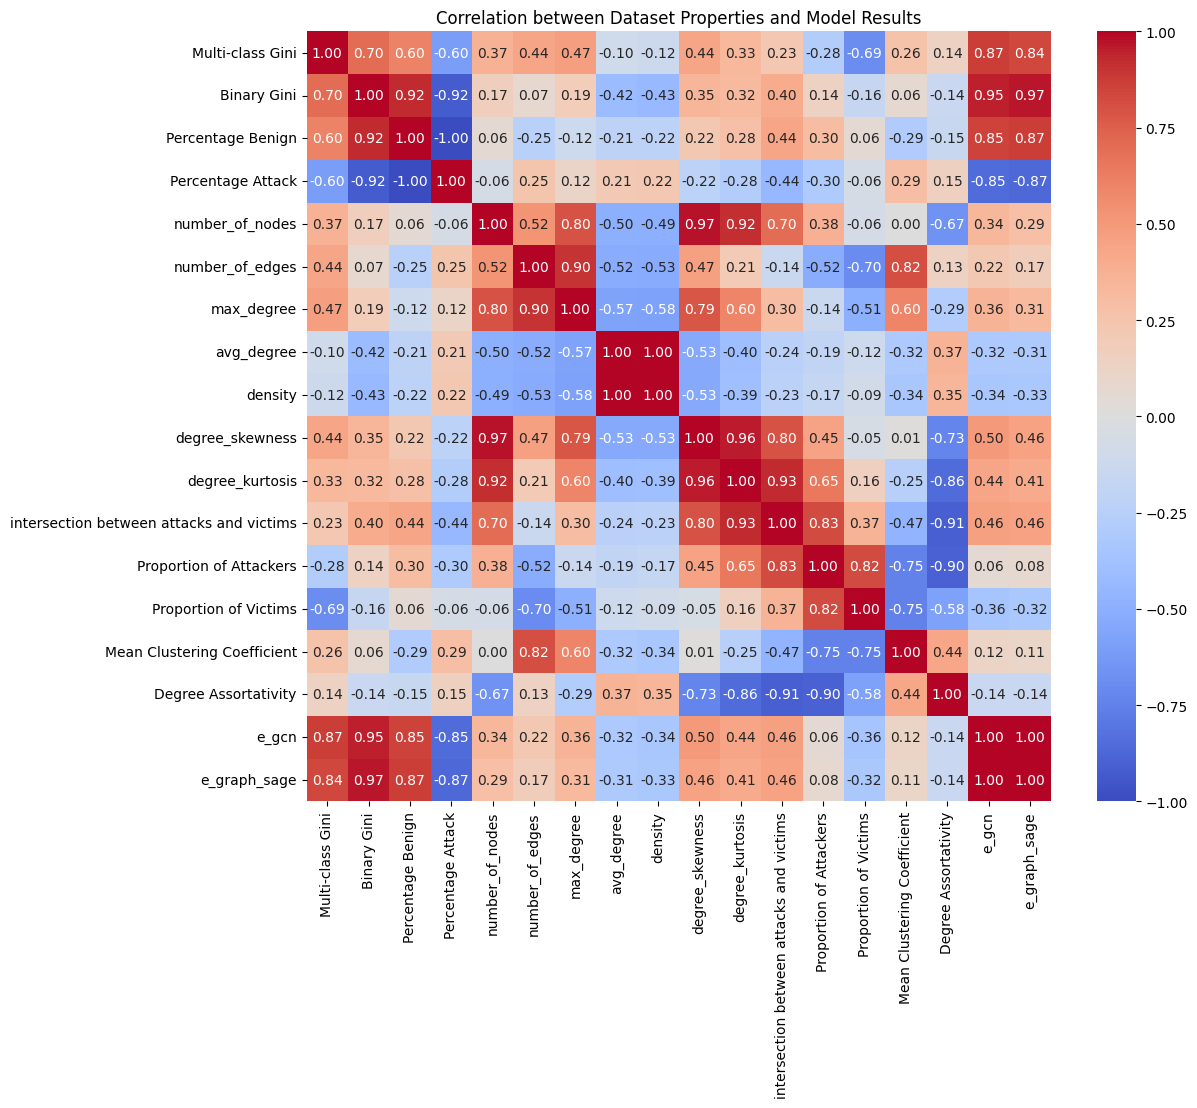

In [36]:
# Remove non-numeric columns for correlation calculation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Step 5: Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Dataset Properties and Model Results')
plt.show()

# Datasets Clustering

In [37]:
feature_columns = list(properties_df.columns.drop("Dataset"))


Datasets grouped into clusters:
                Dataset  Cluster
0           cic_ton_iot        0
1          cic_ids_2017        2
2  cic_ton_iot_modified        0
3     ccd_inid_modified        1
4             edge_iiot        2
5                x_iiot        1


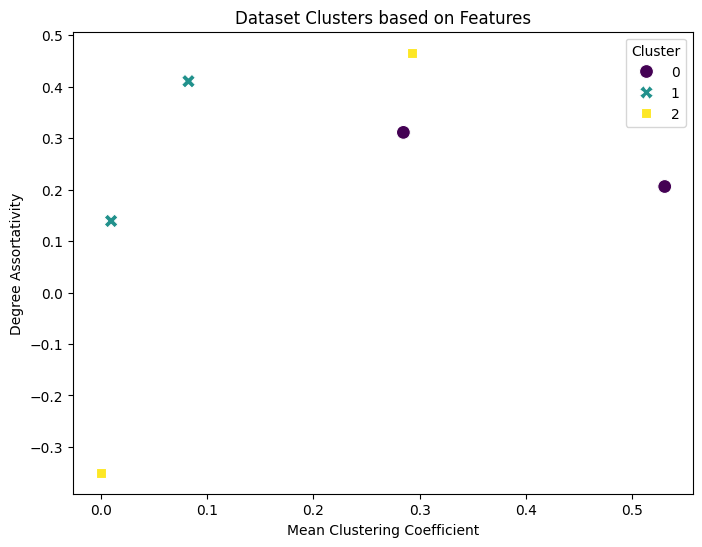

In [38]:

from sklearn.cluster import KMeans
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features = merged_df[feature_columns]
merged_df['Cluster'] = kmeans.fit_predict(features)

# Display datasets with their assigned clusters
print("\nDatasets grouped into clusters:")
print(merged_df[['Dataset', 'Cluster']])

# Step 6: Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Mean Clustering Coefficient', 
    y='Degree Assortativity', 
    hue='Cluster', 
    data=merged_df, 
    palette='viridis', 
    style='Cluster', 
    s=100
)
plt.title('Dataset Clusters based on Features')
plt.xlabel('Mean Clustering Coefficient')
plt.ylabel('Degree Assortativity')
plt.legend(title='Cluster')
plt.show()


In [39]:
merged_df.all()

Dataset                                      True
Multi-class Gini                             True
Binary Gini                                  True
Percentage Benign                            True
Percentage Attack                            True
number_of_nodes                              True
number_of_edges                              True
max_degree                                   True
avg_degree                                   True
density                                      True
degree_skewness                              True
degree_kurtosis                              True
intersection between attacks and victims     True
Proportion of Attackers                      True
Proportion of Victims                        True
Mean Clustering Coefficient                  True
Degree Assortativity                         True
e_gcn                                        True
e_graph_sage                                 True
Cluster                                     False


In [40]:
# merged_df[["Dataset", "Proportion of Attackers", "mean_edge", "mean_centralities", "mean_line_graph", "Cluster"]]

In [41]:
cluster_features = merged_df.groupby('Cluster')[feature_columns].mean()
print("\nAverage feature values for each cluster:")
print(cluster_features)


Average feature values for each cluster:
         Multi-class Gini  Binary Gini  Percentage Benign  Percentage Attack  \
Cluster                                                                        
0                0.693286     0.051276          44.872449          55.127551   
1                0.551547     0.017275          51.727550          48.272450   
2                0.819756     0.255749          75.574892          24.425108   

         number_of_nodes  number_of_edges  max_degree   avg_degree    density  \
Cluster                                                                         
0               104106.0        5132836.5   2066788.0   112.493785   0.000704   
1                  107.5         348006.5    159853.5  6264.487691  28.466144   
2                97912.0        2423399.5   1367691.5   158.651982   0.003879   

         degree_skewness  degree_kurtosis  \
Cluster                                     
0             140.208682     23604.107118   
1               

In [42]:
# models = ["e_gcn","e_graph_sage","e_gat","nodes_e_gcn","nodes_e_graph_sage","nodes_e_gat","line_graph_gcn","line_graph_graphsage","line_graph_gat"]
# models = ["e_gcn","e_graph_sage","e_gat"]
# models_mean = ["mean_edge","mean_centralities","mean_line_graph"]

In [43]:
# feature = 'density'
# for m in models_mean:
#     sns.lineplot(data=merged_df, x=feature, y=m, label=m)
    
# plt.title(f'{feature} vs models F1-score')
# plt.xlabel(feature)
# plt.ylabel(f'models F1-score')
# plt.legend(title="Models")  # Add legend with a title
# plt.show()

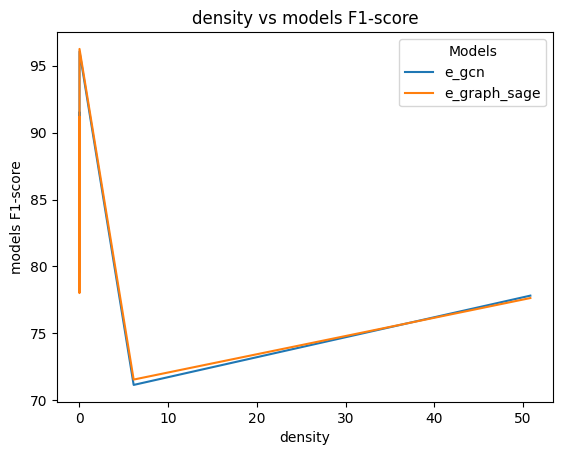

In [44]:
feature = 'density'
for m in models:
    sns.lineplot(data=merged_df, x=feature, y=m, label=m)
    
plt.title(f'{feature} vs models F1-score')
plt.xlabel(feature)
plt.ylabel(f'models F1-score')
plt.legend(title="Models")  # Add legend with a title
plt.show()

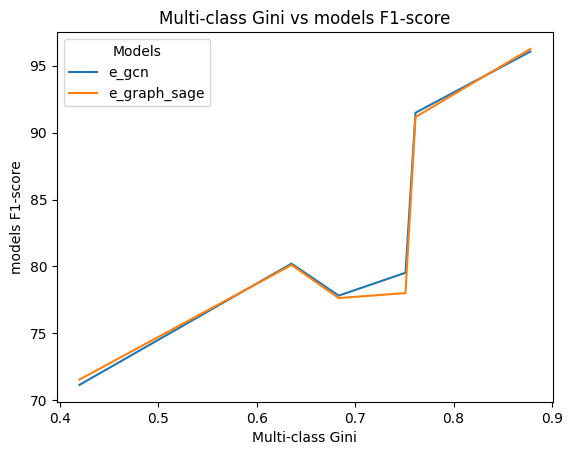

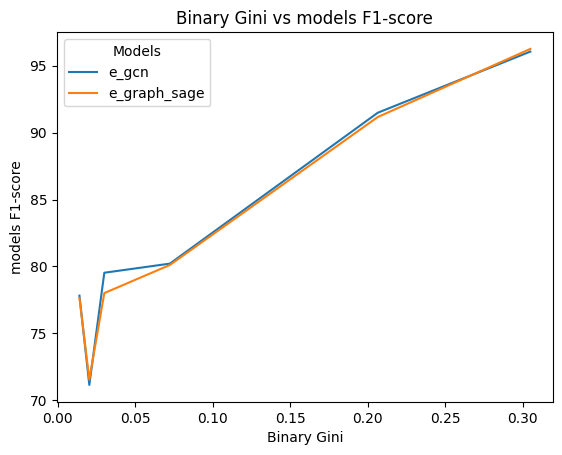

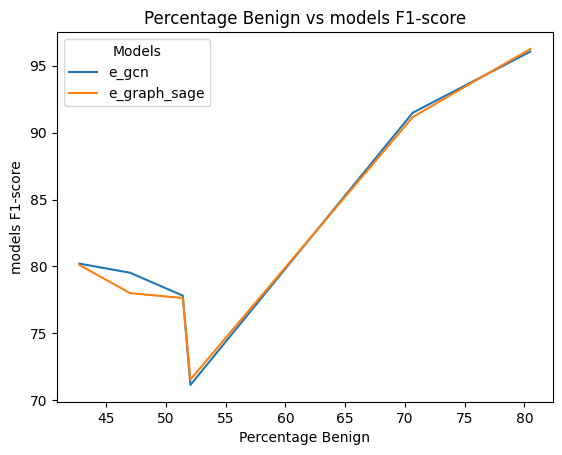

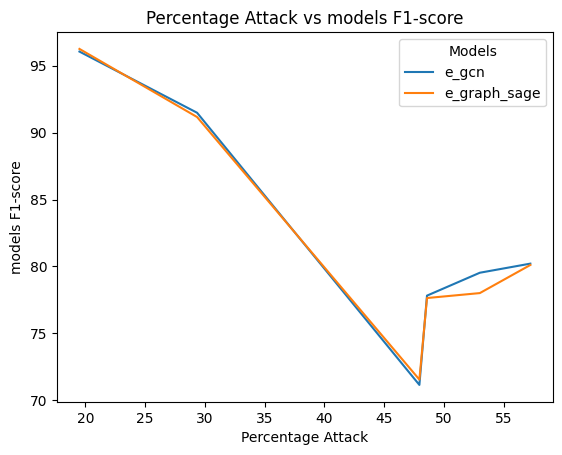

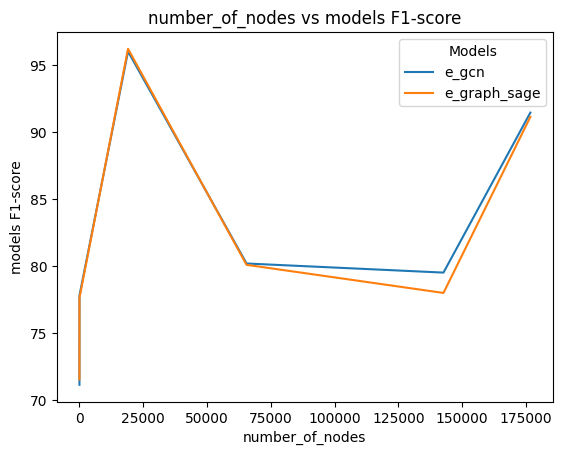

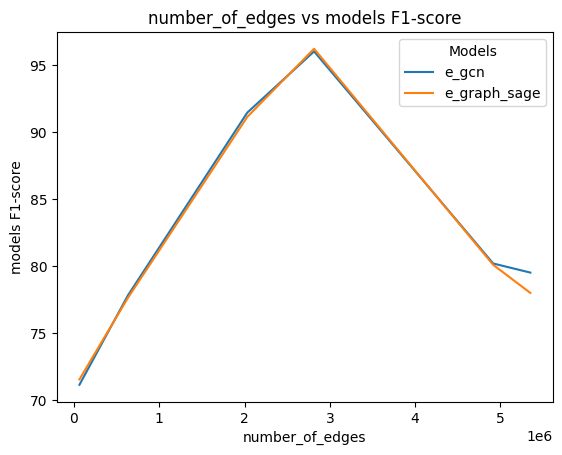

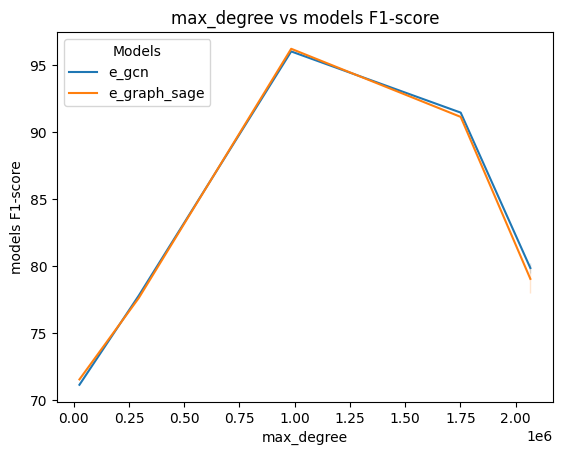

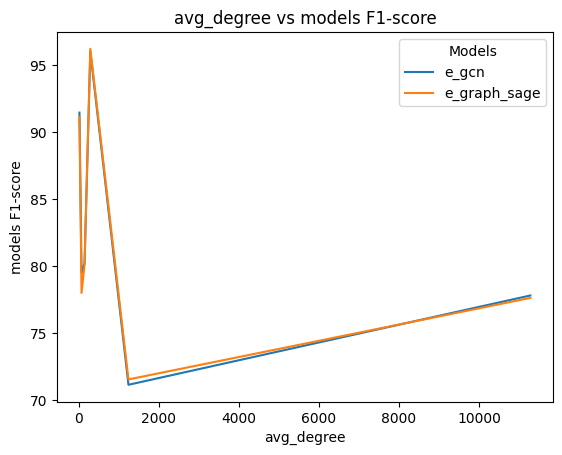

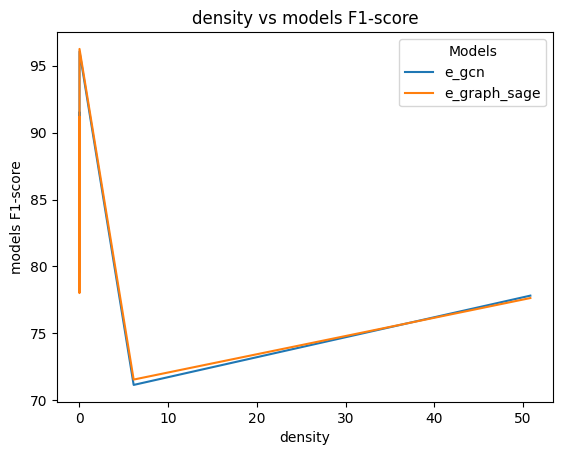

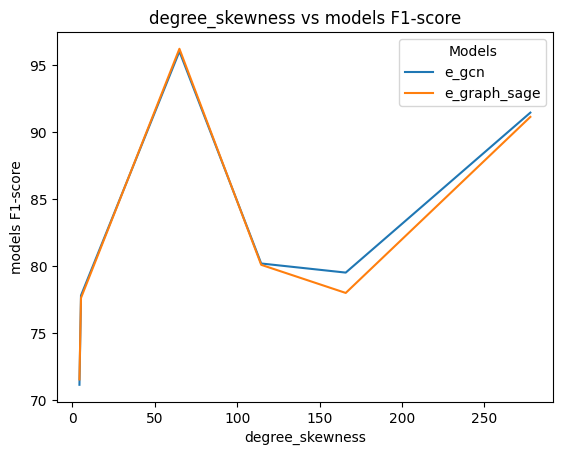

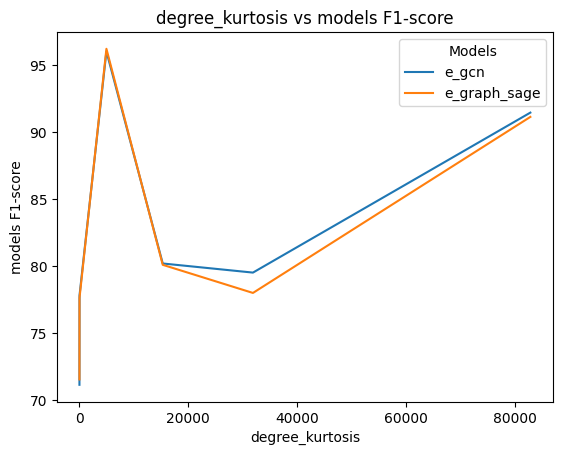

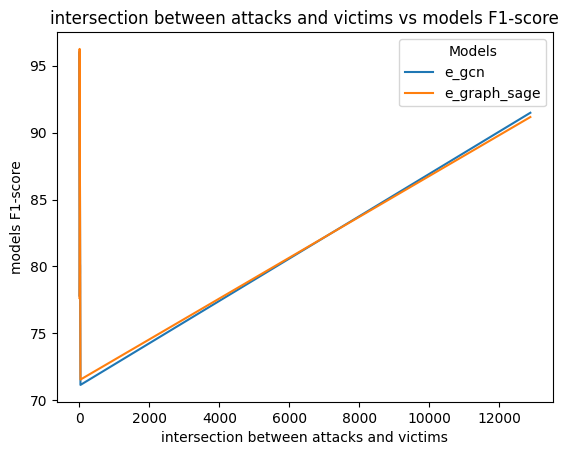

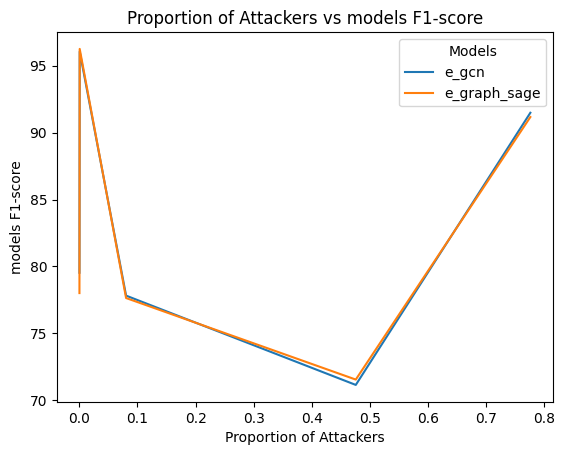

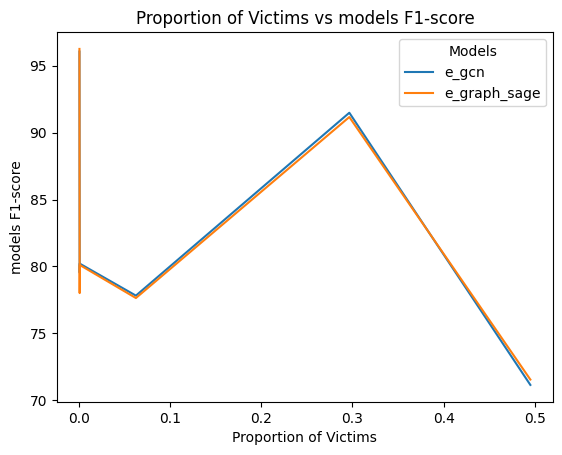

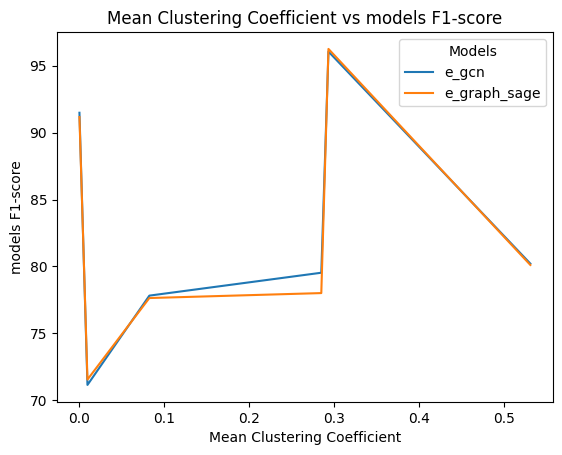

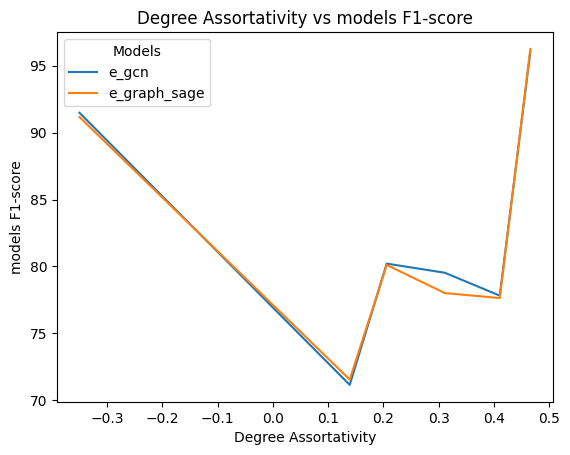

In [45]:
for feature in feature_columns:
    for m in models:
        sns.lineplot(data=merged_df, x=feature, y=m, label=m)  # Add label for the model
    plt.title(f'{feature} vs models F1-score')
    plt.xlabel(feature)
    plt.ylabel('models F1-score')
    plt.legend(title="Models")  # Add legend with a title
    plt.show()


In [46]:
# models = ['e_gcn', 'e_graph_sage', 'e_gat']
# models = ['nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat']
# models = ['line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']

In [47]:
# for feature in feature_columns:
#     for m in models:
#         sns.lineplot(data=merged_df, x=feature, y=m, label=m)  # Add label for the model
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.legend(title="Models")  # Add legend with a title
#     plt.show()


In [48]:
# for feature in feature_columns:
#     for m in models_mean:
#         sns.lineplot(data=merged_df, x=feature, y=m)
#     plt.title(f'{feature} vs models F1-score')
#     plt.xlabel(feature)
#     plt.ylabel('models F1-score')
#     plt.show()
    # model = 'e_gat'
    # sns.lineplot(data=merged_df, x=f, y=model)
    # plt.title(f'{f} vs {model} F1-score')
    # plt.xlabel(f)
    # plt.ylabel(f'{model} F1-score')
    # plt.show()

In [49]:
# if 'mean_line_graph' in merged_df.columns:
#     sns.lineplot(data=merged_df, x='density', y='mean_line_graph')
#     # sns.lineplot(data=merged_df, x='density', y='line_graph_graphsage')
#     # sns.lineplot(data=merged_df, x='density', y='line_graph_gat')
#     plt.title('density vs mean_line_graph F1-score')
#     plt.xlabel('density')
#     plt.ylabel('mean_line_graph F1-score')
#     plt.show()
# else:
#     print("Column 'mean_line_graph' not found in the merged DataFrame.")


In [50]:
# Step 7: Identify when each model performs better
# model_columns = ['e_gcn', 'e_graph_sage', 'e_gat', 'nodes_e_gcn', 'nodes_e_graph_sage', 'nodes_e_gat', 'line_graph_gcn', 'line_graph_graphsage', 'line_graph_gat']
for model in models:
    if model in merged_df.columns:
        better_cases = merged_df[model] == merged_df[models].max(axis=1)
        print(f"\nCases where {model} performs better:")
        print(merged_df[better_cases][["Cluster", 'Dataset', model]])



Cases where e_gcn performs better:
   Cluster               Dataset  e_gcn
0        0           cic_ton_iot  79.53
2        0  cic_ton_iot_modified  80.21
4        2             edge_iiot  91.48
5        1                x_iiot  77.82

Cases where e_graph_sage performs better:
   Cluster            Dataset  e_graph_sage
1        2       cic_ids_2017        96.248
3        1  ccd_inid_modified        71.550


In [51]:
# Step 8: Identify when a category of models performs better
categories = {
    'Category_1': ['e_gcn', 'nodes_e_gcn', 'line_graph_gcn'],
    'Category_2': ['e_graph_sage', 'nodes_e_graph_sage', 'line_graph_graphsage'],
    'Category_3': ['e_gat', 'nodes_e_gat', 'line_graph_gat']
}

for category, models in categories.items():
    if all(model in merged_df.columns for model in models):
        merged_df[f'{category}_max'] = merged_df[models].max(axis=1)

# Calculate which category performs best for each dataset
for category, models in categories.items():
    if f'{category}_max' in merged_df.columns:
        better_cases = merged_df[f'{category}_max'] == merged_df[[f'{cat}_max' for cat in categories if f'{cat}_max' in merged_df.columns]].max(axis=1)
        print(f"\nCases where {category} performs better:")
        print(merged_df[better_cases][["Cluster", 'Dataset'] + models])

